<a href="https://colab.research.google.com/github/muhendis/dev-pykasif/blob/master/boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/MyDrive/dikey eksen/code


/content/drive/MyDrive/dikey eksen/code


In [2]:
from assistant.featureselection import FeatureSelection
from assistant.eda import ProfillingReport
from assistant.datacleaning import DataCleaning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


import warnings
warnings.simplefilter(action='ignore')


# 1. Veriyi Yükleme ve Anlama

Boston'daki farklı evler hakkında bilgi içeren konut veri setini kullanacağız. Amaç, verilen özellikleri kullanarak evin fiyat değerini tahmin etmektir.


In [3]:
boston = load_boston()

df_data = pd.DataFrame(boston.data, columns=boston.feature_names)

df_price =  pd.DataFrame(boston.target, columns=["PRICE"])

df = pd.concat([df_data, df_price], axis=1)

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Bu veri setine baktığımızda 506 satır(gözlem) 14 sütundan (öznitelik) olduğu görülüyor. Bu sütunların ne anlam taşıdığına detaylı bakalım.

**CRIM**: şehre göre kişi başına suç oranı

**ZN** : 25.000 sq.ft'den büyük parseller için imar edilen konut arazisinin oranı

**INDUS** : kasaba başına perakende olmayan iş akarı oranı

**CHAS** :Charles River kukla değişkeni (eğer yol nehirle sınırlanıyorsa 1; aksi halde 0)

**NOX** : nitrik oksit konsantrasyonu (10 milyonda bir)

**RM** : konut başına ortalama oda sayısı

**AGE** : 1940'tan önce inşa edilmiş sahibi tarafından kullanılan birimlerin oranı

**DIS** : beş Boston iş merkezine olan ağırlıklı mesafeler

**RAD**: radyal otoyollara erişilebilirlik endeksi

**TAX**: 10.000 USD başına tam değer emlak vergisi oranı

**PTRATIO**: şehre göre öğrenci-öğretmen oranı

**B** : 1000(Bk — 0.63)², burada Bk (Afrika kökenli Amerikalıların) şehre göre oranıdır

**LSTAT**: nüfustaki statüsü düşük olanların yüzdesi

**PRICE** : ev fiyatı

Veriyi anladığımıza göre veri setindeki değişken türlerini belirleyelim.

* **Kategorik değişkenler** : CHAS, RAD

* **Sürekli değişkenler**: CRIM, ZN, INDUS, NOX,RM,AGE, DIS, TAX,PTRATIO, B, LSTAT

* **Hedef değişken** :PRICE


In [4]:
categorical_variables = ['CHAS', 'RAD']
continuous_variables = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT']
target = ['PRICE']

Gerekli değişkenler tespit edildiğine göre Keşifçi Veri Analizi için yazdığımız ProfillingReport sınıfından nesne oluşturma zamanıdır.


In [5]:
pr=ProfillingReport(df, continuous_variables,
               categorical_variables,
               target)

Aşağıdaki kod bloğunda, veri setinde bulunan veri tiplerine bakmak istediğimizde pr.data_types() ve pr.df.info() araçları bize fikir verecektir. Aşağıda görüldüğü üzere çok farklı tipte verilere sahibiz.


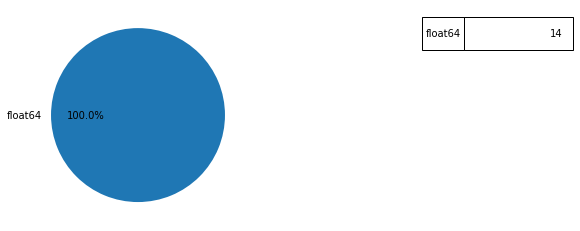

In [6]:
pr.data_types()


In [7]:
pr.df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB




Aşağıdaki kod bloğunda, veri setinde kayıp hücre miktarını öğrenmek için missing_cell_count() metodu kullanıldığında bize veri setinde genel olarak ne kadar kayıp hücre olduğu hakkında fikir veriyor. Veri setinde kayıp hücre olmadığından veri temizleme kısmında kayıp hücre işlemeleri yapmamıza gerk yoktur.


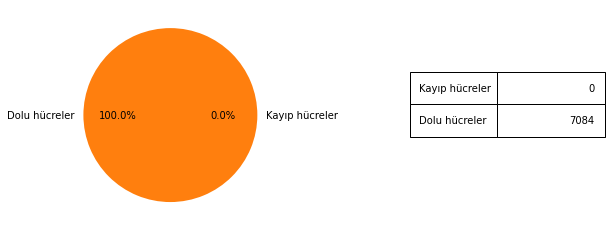

In [8]:
pr.missing_cell_count()

Ve veri setimizde tekarlı bir şekilde yer alan örnekleri(satırlar) duplicate_row_count() metodu ile tespit ettiğimizde %0'lik bir değer elde ediyoruz. Bu sayede veri işleme bölümünde bu tekarlı verileri kaldırma işlemi ile uğraşmayacağız. Eğer yinelenen gözlemler olsaydı onları atmamız gerekirdi. Çünkü makine öğrenmesi modeli eğitiminde model negatif yönde etkilenebilir.



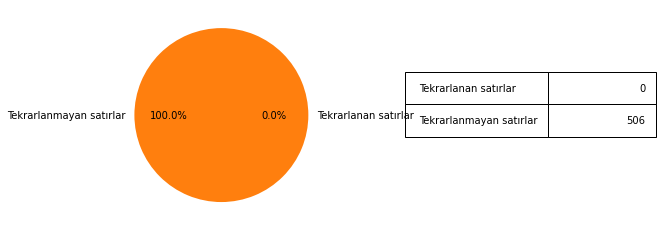

In [9]:
pr.duplicate_row_count()

Veri setinde bulunan özniteliklerin dağılımları aşağıda detaylı olarak inceleyebiliriz. Evlerin genel olarak fiyat dağılımı nasıl? Suç oranları nasıl ? Nitrik oksit konsantrasyonu genel olarak nasıl bir dağılım içinde ? Emlak vergileri oranları dağılımı nasıl? Bölgedeki  öğrenci-öğretmen oranı dağılımı nasıl? gibi sorulara cevap verebilir.Buraya bakarak veri setinin hikayesini bi özet geçmiş gibi olursunuz. (Bu kısmı size bırakıyorum. Çünkü kitabımızda nasıl yorum yapacağımız hakkında sizinle fikirler paylaşmıştım.)

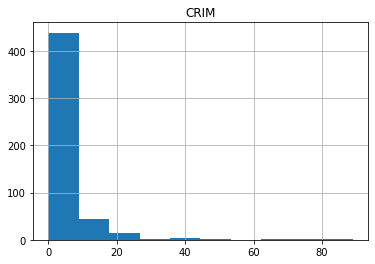

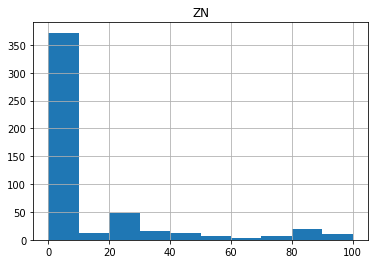

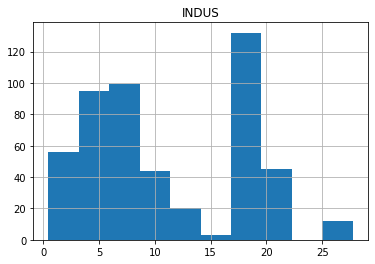

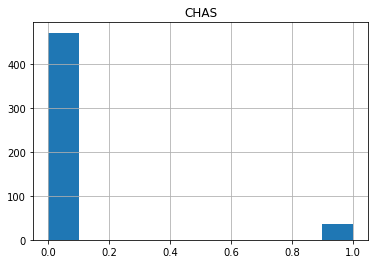

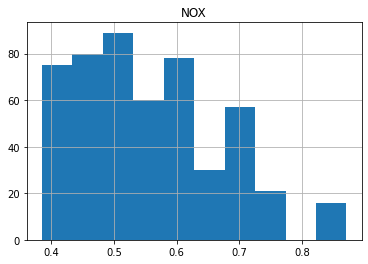

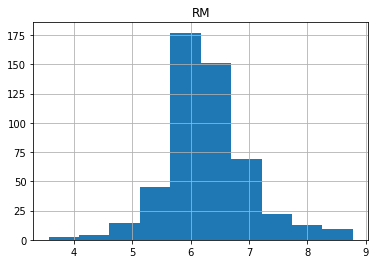

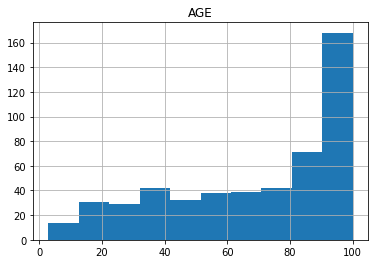

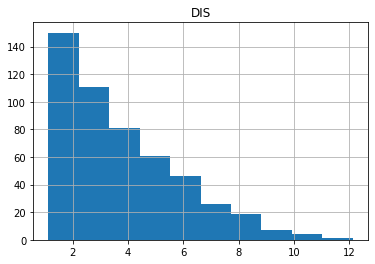

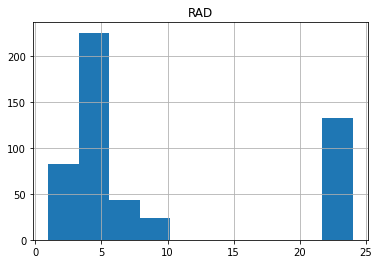

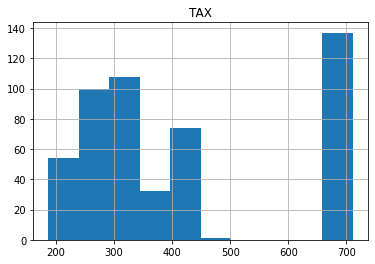

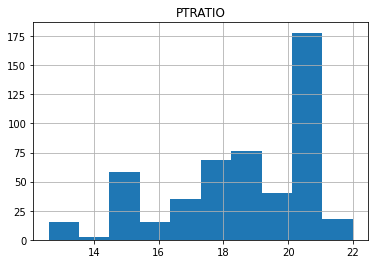

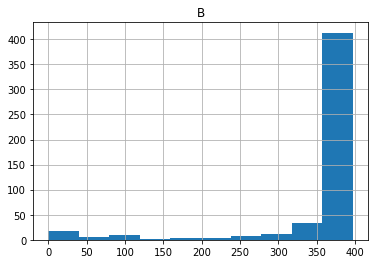

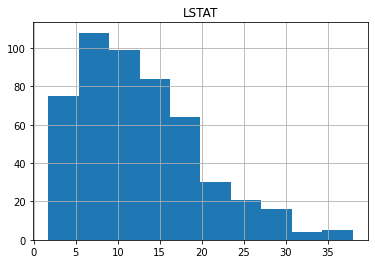

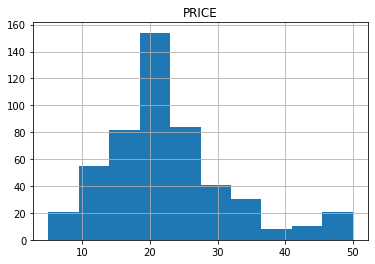

In [10]:
pr.visualize_distribution()

Aşağıda,veri setindeki sürekli değişkenlerden CRIM özniteliğini detaylı incelersek. Aşağıdaki notları çıkarabiliriz.


Veri setindeki bir özelliğin merkezi eğilim ölçülerini ve dağılım ölçülerini incelemek için sırasıyla central_tendency_measures_of_a_feature() ve dispersion_measures_of_a_feature()  metodları kullanıyor. Aşağıdaki hücrenin çıktısı incelendiğinde veri setinde CRIM değişkenin merkezi eğilim ölçülerini ve dağılım ölçüleri bulunuyor. Merkezi eğilim ölçülerinden mode(mod) değerine bakıldığında 0.1501 değeri görülüyor. Mod bize,  0.1501 değerinin veri kümesinde en sık gözlenen değeri olduğunu söyler. Diğer merkezi eğilim ölçülerinden median(medyan) ve mean (ortalama) değerlerine bakıldığında aradaki büyük farktan dolayı verinin normal dağılmadığını direkt görüyoruz. Bunu detaylı görmek için dağılım grafiğine bakabiliriz. Grafikte de görüldüğü üzere CRIM değişkeninde normal bir dağılım yerine sola bir çarpıklık gösteriyor. Bunu ayrıca Skewness(çarpıklık) değerini incelediğimizde  de görüyoruz. 
Diğer değerlere sırasıyla bakacak olursak, 

* count, 506 değeri ile bu değişkenin sahip olduğu 506 tane gözlem olduğunu söyler.
* std (standart sapma), 8.6 olması ortalamın etrafındaki 8.6 değerinde bir dağılım sonucu çıkar.
* min (minimum), 0.00632 olması veri setindeki en küçük değerin 0.00632 olduğunu belirtir. 
* 25% , değişkenin birinci çeyrekteki değerin yaklaşık 0.082 olduğunu belirti.
* 50% , ikinci çeyrekteki değerin 0.25651 olduğunu belirtir.
* 75% , üçüncü çeyrekteki değerin 3.6770825 olduğunu belirtir.
* max (maksimum),  88.9762 olması veri setindeki en büyük değerin 88.9762 olduğunu belirtir. 
* Kurtosis (basıklık), yaklaşık 37.13 olması dağılımın doruğa çıktığını söyler.

Uyarı : Bu değer yorumlamasını unuttuysanız, lütfen “Veri setindeki bir özelliğin dağılım ölçülerinin grafiğinin metodunu ekleme “ kısmına bakınız.

Ve son olarak aşağıda yer alan box-plot(kutu grafiği) incelendiğinde aykırı gözlemlerin olduğunu ve bunların yaklıkş 8.5 değerinden sonra olanlar olduğu gözüküyor.

Bu iki metodu kullanarak diğer sürekli değişkenleri inceleyebilirsiniz.


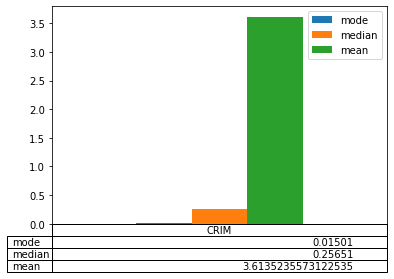

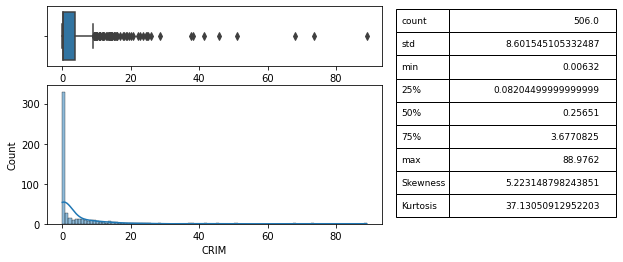

In [11]:
pr.central_tendency_measures_of_a_feature("CRIM")
pr.dispersion_measures_of_a_feature("CRIM")


Veri setindeki sürekli değişkenlerin kovaryans değerlerini incelemek için covariance_matrix() metodu kullanılıyor. Kovaryans grafiğinin çıktısını PRICE değişkeni yani ev fiyatı değişkeni üzerinde incelersek, LSTAT (nüfustaki statüsü düşük olanların yüzdesi) değişkeni ile incelendiğinde -48 değeri karşılar. Bunun anlamı negatif işaretinden dolayı ters yön eğilimindedir. Başka bir deyişle nüfustaki düşük statüde olanların yüzdesi arttıkça ev fiyatlarının düştüğü çıkarımı yapılır. Bunu grafiksel olarak görmek için aşağıdaki ilk kod hücresinin çıktısına baktığımızda da görebiliriz. Ve PRICE ile RM (konut başına ortalama oda sayısı) değişkenleri arasındaki kovaryans değerine baktığımızda ise 4.5 değeri karşılar. Bunun anlamı pozitif işaretinden dolayı aynı yön eğilimindedir. Başka bir deyişle konut başına ortalama oda sayısı  arttıkça ev fiyatlarının arttığı çıkarımı yapılır. Bunu grafiksel olarak görmek için aşağıdaki ikinci kod hücresinin çıktısına baktığımızda da görebiliriz.


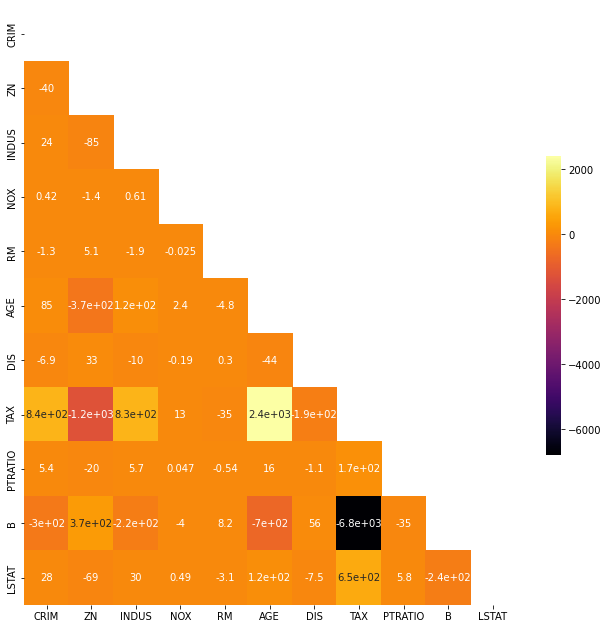

In [12]:
pr.covariance_matrix()


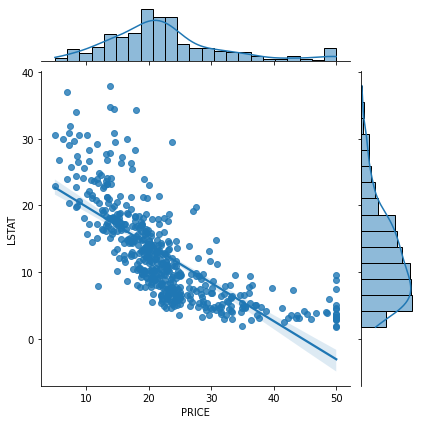

In [13]:
pr.jointplot("PRICE","LSTAT")


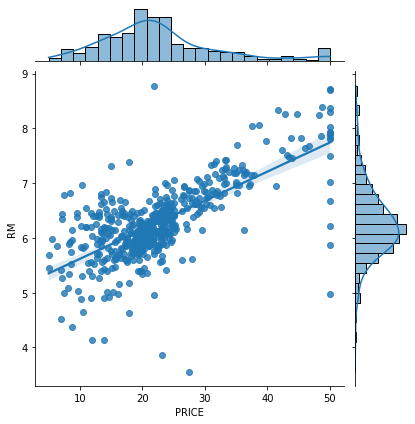

In [14]:
pr.jointplot("PRICE","RM")



Veri setindeki sürekli değişkenlerin doğrusal ilişkisini (korelasyon katsayısı) incelemek için correlation_analysis() metodu kullanılıyor. Korelasyon katsayısı, iki değişkenin kovaryansını, bu iki değişkenin standart sapmalarının çarpımına bölünmesiyle hesaplanıyor. Kovaryans değerlerinde yönelime bakarken burada ek olarak lineer olarak aradaki ilişkiyi oransal olarak çıktısını alıyoruz. Çıktıya bakıldığında yukarıdaki PRICE-LSTAT ve PRICE-RM  arasındaki ilişkileri sırasıyla -73.77% ve 69.54% oranda lineer ilişki olduğunu söylenebilinir. İşaret negatif ise zıt, pozitif ise aynı yönlü olarak yorumlanır. 


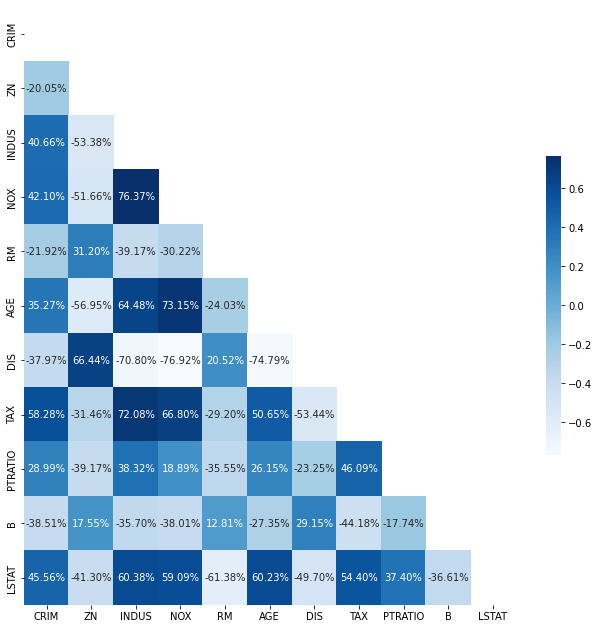

In [15]:
pr.correlation_analysis()


# 2. Veri Temizleme

Veriyi temizlemeye geçmeden önce makine öğrenmesi için hedef değişken(tahmin edilmek istenen) (y) ile tahmin edici değişkenleri (X)(bağımsız değişkenler) veriyi doğru bölmek için ayırmamız gerekiyor.


In [16]:
y=df.loc[:,'PRICE']
X=df.loc[:,[ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

Bağımlı değişkenlere göz atalım.


In [17]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Bağımsız değişkene göz atalım.


In [18]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

Şimdi veriyi işlemek için veriyi bölmemiz gerekiyor. Veri bölme işlemini Eğitim(Train)-Test(Test) diye ayrım yapıyoruz. Bunun için yukarıdaki kodlarda çağırdığımız train_test_split fonksiyonunu kullanacağız. Aşağıdaki blokta, verinin %67'si eğitim %33'ü test veri seti olarak ayrılıyor. Ve random_state diye adlandırılan parametre ise verinin aynı rastgelelik ile bölünmesini sağlıyor. Yani bu komut çalıştığın eğitim ve test kümesi aynı şekil ayrılacaktır. Kodun çıktısına baktığımızda ise X_train ve y_train eğitim için oluşturulurken, X_test ve y_test ise performansı ölçmek için oluşturuldu.


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


Artık veriler ayrıldığına göre bunları bizim veri temizleme sınıfımız olan DataCleaning sınıfına gönderilmek için ayarlayalım . Aşağıdaki kod bloğunda eğitim için oluşturulan X_train ve y_train veri setleri birleştirilip df_train değişkenine atanıyor. Ardında da test için oluşturulan X_test ve y_test veri setleri de birleştirilip df_test değişkenine atanıyor.


In [20]:
#--------------------------------------------#

df_train_X = pd.DataFrame(data=X_train.values,columns=X.columns)
df_train_y = pd.DataFrame(data=y_train.values,columns=[y.name])


df_train = pd.concat([df_train_X, df_train_y],axis=1)

#--------------------------------------------#
df_test_X = pd.DataFrame(data=X_test.values,columns=X.columns)
df_test_y = pd.DataFrame(data=y_test.values,columns=[y.name])

df_test = pd.concat([df_test_X, df_test_y],axis=1)

Veri temizlemek için aşağıda DataCleaning sınıfından bir nesne üreterek işlemlere devam edebiliriz.


In [21]:
dc=DataCleaning(df_train,df_test)


Veri temizleme sınıfında yer alan eğitim veri setine bakmak için aşağıdaki komutu çalıştıralım. Ve göreceğiz ki en başta okuduğumuz veri setinin %67'si eğitim veri setinde olduğunu.


In [22]:
dc.df_train


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,10.23300,0.0,18.10,0.0,0.614,6.185,96.7,2.1705,24.0,666.0,20.2,379.70,18.03,14.6
1,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,4.0,307.0,21.0,376.88,14.81,16.6
2,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
3,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4.0,711.0,20.1,396.90,13.35,20.1
4,0.12802,0.0,8.56,0.0,0.520,6.474,97.1,2.4329,5.0,384.0,20.9,395.24,12.27,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66,19.5
335,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00,21.1
336,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99,24.5
337,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27,13.4


Veri temizleme sınıfında yer alan test veri setine bakmak için aşağıdaki komutu çalıştıralım. Ve göreceğiz ki en başta okuduğumuz veri setinin %37'si eğitim veri setinde olduğunu.


In [23]:
dc.df_test


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04,23.6
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,32.4
2,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6
3,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,22.8
4,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,0.10793,0.0,8.56,0.0,0.520,6.195,54.4,2.7778,5.0,384.0,20.9,393.49,13.00,21.7
163,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87,23.1
164,0.76162,20.0,3.97,0.0,0.647,5.560,62.8,1.9865,5.0,264.0,13.0,392.40,10.45,22.8
165,1.00245,0.0,8.14,0.0,0.538,6.674,87.3,4.2390,4.0,307.0,21.0,380.23,11.98,21.0


Keşifçi Veri Analizinde incelediğimizde yinenlenen gözlemler olmadığını tespit etmiştik fakat yine de veri temizleme bölümünde tekrar bakalım.  Ve show_duplicate_observations() metodu da bizi doğruluyor. Yinenlenen gözlem olmadığından silme operasyonu yapamıyoruz. (Titanic projesinde yapılmıştı.) 

In [24]:
dc.show_duplicate_observations()

{'df_test': Empty DataFrame
 Columns: [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, PRICE]
 Index: [], 'df_train': Empty DataFrame
 Columns: [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, PRICE]
 Index: []}

Ve yine Keşifçi Veri Analizinde incelediğimizde eksik hücrelerin  olmadığını tespit etmiştik fakat tekrar olarak veri temizleme bölümünde bi daha bakalım.  Ve show_missing_values() metodu da bizi doğruluyor. Eksik hücre  olmadığından tedavi yöntemlerini uygulayamıyoruz. (Titanic projesinde yapılmıştı.) 

In [25]:
dc.show_missing_values()

{'df_test': CRIM       0
 ZN         0
 INDUS      0
 CHAS       0
 NOX        0
 RM         0
 AGE        0
 DIS        0
 RAD        0
 TAX        0
 PTRATIO    0
 B          0
 LSTAT      0
 PRICE      0
 dtype: int64, 'df_train': CRIM       0
 ZN         0
 INDUS      0
 CHAS       0
 NOX        0
 RM         0
 AGE        0
 DIS        0
 RAD        0
 TAX        0
 PTRATIO    0
 B          0
 LSTAT      0
 PRICE      0
 dtype: int64}


Size yukarıda ödev/görev olarak verilen grafik incelemeyi yaptıysanız. Oradaki kutu grafiğinde hangi sürekli değişkenlerin aykırı (outlier) değer içerdiğini fark etmiş olmalısınız. 

(Sürekli değişkenlerdeki kutu grafiklerini incelediğinizi var sayıyorum.)Şimdi kutu grafiğinden en göze çarpan CRIM özniteliğinde oldukça aykırı (outlier) değer olduğunu farketik.  Çeyrekler arası Aralık yöntemi ile tespit ediyoruz. Görüldüğü üzere aralığımız -30.125 ile 71.675 arası seçildi. result değişkeni eğitim ve test veri seti için aykırı değerleri tutuyor.

In [26]:
result=dc.outlier_detection(feature="CRIM",strategy="inter_quartile_range")

Alt sınır :  -4.8912475 
Üst sınır :  8.371012499999999


Eğitim veri setindeki aykırı değerlerin indeksleri aşağıda tespit ediliyor.


In [27]:
train_outlier_index=result["df_train"].index
train_outlier_index

Int64Index([  0,  14,  16,  26,  27,  31,  52,  56,  64,  80,  90, 111, 112,
            117, 120, 123, 129, 148, 152, 154, 157, 165, 172, 178, 179, 182,
            187, 193, 195, 208, 213, 221, 227, 229, 232, 250, 261, 265, 267,
            271, 279, 294, 310, 312, 314, 337],
           dtype='int64')

Test veri setindeki aykırı değerlerin indeksleri aşağıda tespit ediliyor.


In [28]:
test_outlier_index=result["df_test"].index
test_outlier_index

Int64Index([ 12,  17,  19,  27,  32,  66,  72,  75,  78,  83,  91,  96,  97,
             98,  99, 102, 110, 111, 115, 122, 144, 147, 151, 156, 159],
           dtype='int64')

 Elde edilen indeksler yardımıyla bunları veri setlerinden aşağıdaki blok yardımıyla atalım.


In [29]:
dc.df_train=dc.df_train.drop(train_outlier_index)
dc.df_test=dc.df_test.drop(test_outlier_index)

Şimdi ise temizlenen bu veri setlerini kayıt altına alalım. Kayıt almak için DataCleaning sınıfındaki df_train ile df_test veri setlerini , global df_train ve df_test değişkenlerine eşleyelim.


In [30]:
df_train = dc.df_train
df_test=dc.df_test

# 3. Öznitelik Seçme

Öznitelik seçimi için yine kitabımızda beraber geliştirdiğimiz FeatureSelection sınıfını kullanarak gerçekleştireceğiz.  Aşağıda standart bir şekilde FeatureSelection sınıfımızdan nesne oluşturuyoruz.


In [31]:
target = "PRICE"
fc=FeatureSelection(df_train, continuous_variables,
               categorical_variables,
               target)



Hedef değişken sürekli olduğundan bağımsız değişkenlerden sürekli olanlar ile Korelasyon Katsayısı değerlerine bakılırken bağımsız değişkenlerden kategorik olanlar ile de ANOVA testi yaparak ilgili öznitelikleri seçebiliriz.




Hedef değişken ile 0.4 değerinden yüksek korelasyonu olan sürekli değişkenler, RM, PTRATIO ve LSTAT'dır. Burada ek olarak  korelasyonu yüksek olan özniteliklerin bir birleri arasındaki korelasyonunada bakıldığında, RM ve LSTAT değişkenlerinin birbirleriyle oldukça ilişkili olduğu görülmektedir (-0.650837). Dolayısıyla sadece bir değişkeni tutup diğerini bırakacağız. PRICE ile korelasyonu LSTAT'dan daha yüksek olduğu için RM'i tutacağız. LSTAT'yi bıraktıktan sonra geriye iki özellik kalıyor, RM ve PTRATIO.


In [32]:
fc.correlation(threshold_for_target=0.4)

Hedef değişken ile korelasyonu yüksek olan değişkenler :
 RM         0.756801
PTRATIO   -0.411452
LSTAT     -0.699553
Name: PRICE, dtype: float64 


Diğer değişkenlerin kendi aralarındaki korelasyon : 
                RM   PTRATIO     LSTAT
RM       1.000000 -0.310059 -0.650837
PTRATIO -0.310059  1.000000  0.259240
LSTAT   -0.650837  0.259240  1.000000


Hedef değişken ile kategorik değişkenlerin ANOVA test sonucu aşağıda görüldüğü üzere hedef değişken bütün öznitelikler ile ilişkili çıkmıştır. 


In [33]:
for cat_var in categorical_variables:
  fc.ANOVA_test(variable=cat_var)

##### ANOVA Sonucu ##### 

CHAS ,  PRICE ile ilişkilidir. | P-Value: 0.00012538771788016525
##### ANOVA Sonucu ##### 

RAD ,  PRICE ile ilişkilidir. | P-Value: 3.5667988636653157e-06


Yukarıdaki analizler sonucunda RM, PTRATIO, CHAS ve RAD öznitelikleri ile makine öğrenmesi modelleri kurulacaktır. Ondan dolayı df_train ve df_test veri setlerini aşağıdaki gibi güncelleyelim.


In [34]:
df_train = df_train[["RM", "PTRATIO", "CHAS" , "RAD","PRICE"]]
df_test = df_test[["RM", "PTRATIO", "CHAS" , "RAD","PRICE"]]

In [35]:
df_train

,RM,PTRATIO,CHAS,RAD,PRICE
1,5.813,21.0,0.0,4.0,16.6
2,6.172,15.2,0.0,5.0,27.1
3,5.983,20.1,0.0,4.0,20.1
4,6.474,20.9,0.0,5.0,19.8
5,5.850,19.2,0.0,5.0,21.0
...,...,...,...,...,...
333,5.961,19.2,0.0,4.0,21.7
334,5.836,20.9,0.0,5.0,19.5
335,5.856,18.6,0.0,3.0,21.1
336,6.635,17.0,0.0,4.0,24.5


In [36]:
df_test

,RM,PTRATIO,CHAS,RAD,PRICE
0,6.416,16.6,0.0,5.0,23.6
1,6.758,17.6,1.0,4.0,32.4
2,5.983,20.1,0.0,4.0,13.6
3,6.065,19.2,0.0,4.0,22.8
4,6.297,20.2,0.0,24.0,16.1
...,...,...,...,...,...
162,6.195,20.9,0.0,5.0,21.7
163,6.376,19.6,0.0,5.0,23.1
164,5.560,13.0,0.0,5.0,22.8
165,6.674,21.0,0.0,4.0,21.0


# 4. Model Kurma

Yukardıda görüldüğü üzere kategorik değişkenler sayısal halde görünüyor. O yüzden Titanic projesinde yapılan Label Encoding veya One-Hot Encoding yapmaya gerek yoktur.

Şimdi ise makine öğrenmesi için hedef değişken ile tahmin edici değişkenleri (bağımsız değişkenler) tekrardan belirme zamanıdır.


In [37]:
all_features = df_test.columns.to_list()
#####################################################################
y_feature = ['PRICE']
print("Hedef değişken (y_feature) : ",y_feature)
all_features.remove('PRICE') # hedef değişken listeden kaldırılıyor.
X_features = all_features
print("Bağımsız değişkenler (X_feature) : ",X_features)

Hedef değişken (y_feature) :  ['PRICE']
Bağımsız değişkenler (X_feature) :  ['RM', 'PTRATIO', 'CHAS', 'RAD']


X_train üzerinde makine öğrenmesi belli başlı yapıları öğrenerek y_train değişkeninde bulunan değerleri tespit etmeye çalışacaktır. Ve makine öğrenmesi modelinin performanısını ölçmek için de test verisi gerekecektir. Performansı görmek için, modelin görmediği X_test test veri seti üzerinde modele tahmin yaptırarak bir tahmin sonucu elde ettikten sonra bu sonuçları  y_test ile karşılaştırdığımızda performansı göreceğiz. 

In [38]:
X_train = df_train.loc[:,X_features].values
X_test = df_test.loc[:,X_features].values

y_train = df_train.loc[:,y_feature].values
y_test = df_test.loc[:,y_feature].values

Makine öğrenmesi modelini kurma aşamasına geldik. Şimdi ilk olarak Destek Vektör Regresyonu ile regresyon modelini kuralım. Bu algoritmayı kullanmak için kullan SVR sınıfı kullanmalıyız. Aşağıda da görüldüğü üzere SVR sınıfına çeşitli hiper parametreler (kernel ve gamma) girilmiştir. Bu parametreler sayesinde herhangi bir algoritma veriyi daha iyi analiz edebilir. Bu hiper parametreler algoritmalara göre değişir. Aşağıda görüldüğü üzere biz sadece kernel ve gamma hiper parametrelerine özel bir değer atadık.Bu hiper parametreleri ayarlamaya ince ayar yapma (hyperparameter tuning) denir. Eğer bir algoritmanın verinize iyi oturmasını istiyorsanız mutlaka o algoritmanın hiper parametrelerini keşfet edin. (Aşağıdaki parametreleri size araştırma ödevi olarak veriyorum :) )

Aşağıdaki kod incelendiğinde, SVR() sınıfından üretilen nesnenin fit() adındaki metoduna X_train ve y_train değişkenleri gönderiliyor. Bunun amacı SVR algoritmasını eğitmek içindir. Ardında da görüldüğü üzere predict() metodu çağrılıyor. Bu metodun amacı da verilen bağımsız değişkenlerden hareketle bağımlı değişkeni tahmin etmektir. Biz predict() metoduna X_test ile test veri setinin bağımsız verilerini gönderdik. Ardında y_pred adında modelin bize tahmin ettiği bağımsız değişken değerleri elde edildi. Sonra ise modelin performansını ölçmek için de hata metriği görevini yapan mean_squared_error() fonksiyonu ile de tahmin edilen (y_pred) ile gerçek-doğru (y_test) değerlerini karşılaştırarak modelin performansı veriyor. Aşağıda görüldüğü üzere bu modelin hata skoru 24.73 . 


In [39]:
reg = SVR(kernel="rbf",gamma=0.1)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
print(mean_squared_error(y_test,y_pred))

24.737443055944187


Genel olarak bir algoritmanın nasıl eğitilip nasıl test edildiğini gördük. Yukarıda görüldüğü üzere 24.73’lik bir hata skoru elde edilmiş. Bu skor kötü olduğundan  iyisini yapabilir miyiz acaba ? sorusu hemen kıllara geliyor değil mi? Evet ,bu modelin ince ayarlarını (kernel,gamma gibi parametreleri) farklı değerler ile tek tek deneyip en iyi sonucu almamız gerekir. En iyi sonucu deneyerek bulabiliriz. Fakat belki biz en iyi ince ayarları yapsak bile seçtiğim algoritma bizim veri setine uygun olmadığından istediğimiz sonucu alamayabiliriz. O zamanda yeni bir algoritma kurup onun ince ayarlarını yapıp istediğimiz skoru almaya çalışabiliriz. O algoritmada olmazsa başka bir algoritma denenmelidir.

Gördüğünüz üzere durmadan farklı algoritmaları farklı parametreler ile deneme süreci var. Bu görev için GridSearchCV adında çok güzel bir araç vardır. GridSearchCV bu hiper parametreleri (ince ayar parametreleri) bizim için dener. Ve bize en iyi skora sahip modelin hiper parametrelerini de verir. GridSearchCV aracının bir diğer özelliği ise tek bir algoritma için değilde birden fazla algoritmayı da aynı anda çalıştırabilir. Bu aracın en göze çarpan dezavantajı çok zaman almasıdır.

GridSearchCV ile makine öğrenmesi modeli eğitimi için en uygun ince ayar değerlerini bulma Cross Validation (CV - Çapraz Doğrulama) diye adlandırılan yöntem üzerinden gerçekleşir. Çeşitli çapraz doğrulama yöntemleri vardır.

* Çapraz Doğrulama yöntemlerinden en bilineni **K-fold Cross Validation ( K-kat Çapraz Doğrulama)**.K-kat Çapraz Doğrulama, train-test veri seti bölmenin benzer bir yoludur. Ama burada bölünen veri ham veri seti değilde en başta bölünen eğitim ve test diye bölünen eğitim veri seti üzerinden işler yürür. Veri seti (en başta bölünen eğitim veri setinden bahsediliyor) k alt kümeye bölünür ve k kez makine öğrenmesi modeli eğitilir. Eğitimin her seferinde, k alt kümelerinden biri test kümesi olarak kullanılır ve diğer k-1 alt kümeleri bir eğitim kümesi oluşturmak için bir araya getirilir. Daha sonra tüm k tane deneme sonucunda k tane doğruluk skoru elde edilir. Ve GridSearchCV ise en iyi skora sahip olan modeli bize seçer.

* Diğer çokça kullanılan çaprazlama yöntemi ise, **Stratified K Fold Cross Validation** adlandırılan yöntemdir.Bu yöntem sınıflandırma problemleri için kullanılır. Biz de bu yöntemi aşağıda kullanacağız. Bu yöntemin bir önceki çapraz doğrulama yönteminden farkı k tane kümenin içerisindeki sınıfları eşit dağıtmasıdır.Bunu yaparak herhangi bir sınıfı herhangi bir kümede rastgele toplanması yerine kümelere eşit dağıtıp işlerim öyle yapmasıdır.

Ve sonuçta, en iyi tahmin edicinin çapraz doğrulanmış ortalama skorundan hareketle en iyi sonucu veren ince ayar parametreleri o algoritma için seçiliyor. Haydi şimdi GridSearchCV kullanarak Karar Ağaçları Regresyonu (DecisionTreeRegressor), Destek Vektör Regresyonu (SVR),Rassal Orman Regresyonu (RandomForestRegressor), Lineer Regresyon (LinearRegression) ve K En Yakın Komşular Regresyonu(KNeighborsRegressor) algoritmaları için bu eğitim veri seti için parametre değerlerini bulalım.


GridSearchCV aracına ilk başta hangi algoritmaları kullanacağımızı bir liste içinde aşağıdaki gibi belirtelim. Ve algoritmaların her seferde aynı sonucu vermesi için random_state  adında bir değişken kullanıyoruz. Bu değişkene bir sabit değişken olarak 49 değeri atıyoruz. Bazı algoritmalar yapısı gereği rastgelelik ile değer atamalarından dolayı biz bu değer atamayı böylece sabitliyoruz. Böylece biz bu kodu her seferinde çalıştırdığımızda aynı hata skorunu elde edeceğiz. 




In [40]:
random_state=49
regressor = [
             DecisionTreeRegressor(random_state = random_state),
             SVR(),
             RandomForestRegressor(random_state = random_state),
             LinearRegression(),
             KNeighborsRegressor()]

Şimdi ise hangi parametrelerin hangi aralıktaki değerler ile deneme yapılıp algoritmanın eğitimi yapılması aşamasına geldik. Eğitim denemesi yapılması için her bir algoritmaya özel bir python sözlük yapısında algoritmanın hiper parametre seti oluşturmalıyız. Bu seti açıklamak için aşağıdan K En Yakın Komşular Regresyonu için oluşturulan knn_hyperparameters sözlük yapısın bakabiliriz. Görüldüğü üzere n_neighbors parametresi için [1,3,5,7] değerini içeren bir liste verilmiştir. Bu listenin anlamı, K En Yakın Komşular Regresyonu algoritması eğitimi denemeleri yapılırken ilk başta en yakın 1 komşuya bak , ardından 3, sonra 5 ve en sonki denemende en yakın 7 komşuya bak ona göre bir eğitim yap. Bunları yaparkende "metric":["manhattan"] ile mesafe ölçümünü de manhattan ile yap anlamı çıkar. En son nihayetinde en yüksek skor hangi kombinasyonda çıkarsa o değerler o algoritma için en iyi parametreler olarak seçilecektir. Diğer parametreleri de size ödev olarak veriyorum. Lütfen bu parametreleri detaylı olarak araştırın . Çünkü sizin gelişiminizde çok büyük bir etken olacaktır.

Bütün algoritmalarının hiper parametre sözlükleri regressor listesindeki algoritma sırası ile bir bir python listesinde biriktiriliyor.

In [41]:

dt_hyperparameters= {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svr_hyperparameters= {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1],
                 "C": [1,10,50,100,250,500]}

rf_hyperparameters= {'n_estimators':[20,30,40,60,100],
                     'max_depth':  
             [5,10,15,20]}

rf_hyperparameters= {'n_estimators':[20,30,40,60,100], 'max_depth': 
             [5,10,15,20],'max_features':[2,5,8]}


linreg_hyperparameters= {} 

knn_hyperparameters= {"n_neighbors": [1,3,5,7],
                 "metric":["manhattan"]} 
             
regressor_param = [dt_hyperparameters,
                   svr_hyperparameters,
                   rf_hyperparameters,
                   linreg_hyperparameters,
                   knn_hyperparameters]


Her şey hazırsa GridSearchCV aracını çalıştıralım. cv_result listesi Çapraz Doğrulama Ortalama skor değerlerini tutacaktır. test_mea_error listesi test verilerimizin sonuçlarını tutacaktır. best_estimators ise de her bir algoritmanın hangi parametrelerde en iyi performans verdiğini tutacaktır. GridSearchCV sınıfından nesne oluşturulurken ilk parametre algoritmanın sınıfı gönderiliyor. **param_grid** paramametresine ise ilgili algoritmanın hiper parametre python sözlüğü gönderiliyor. **cv** parametresine ise önceki sayfalarda bahsedilen  K Fold Cross Validation işlemi için cv=5 (K değeri 5 olarak belirtilmiştir.) değeri gönderiliyor. **scoring** parametresine de algoritmaların performans metriği olarak neg_mean_squared_error yani Negatif Ortalama Kare Hatası kullanılması belirtilmiştir. Burada Negatif Ortalama Kare Hatası metriği  Ortalama Kare Hatası metriğinin negatif versiyonun elde edilmesi ile ifade ediliyor.Scikit-learn skorlama için, greater_is_better denilen yaklaşıma sahip ve şöyle ifade eder: Daha yüksek hata dönüş değerleri, düşük hata dönüş değerlerinden daha iyidir. **n_jobs** parametresine -1 değeri verilerek denemelerin paralel olarak hızlı yapılması için kullanıldı. Aşağıdaki kod bloğunu çalıştırdığınızda biraz zaman alabilir. Çünkü bir çok deneme yapılacaktır.



In [42]:
test_mea_error = []
cv_result=[]
best_estimators = []

for i in range(len(regressor)):
    reg = GridSearchCV(regressor[i], param_grid=regressor_param[i], cv = 5, scoring = "neg_mean_squared_error", n_jobs = -1)

    reg.fit(X_train,y_train)

    best_estimators.append(reg.best_estimator_)
    cv_result.append(reg.best_score_*-1) 
    test_mea_error.append(reg.score(X_test,y_test)*-1)



Yukarıdaki kod çalıştıktan sonra hangi algoritmanın belirttiğimiz hangi değerler ile daha başarılı bir sonuç veridğini görmek için aşağıdaki kod bloğunu çalıştırmalıyız. Ve aşağıdaki çıktıyı detaylı olarak inceleyebilirsiniz.



In [43]:
best_estimators


[DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=49, splitter='best'),
 SVR(C=50, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
     kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=5, max_features=2, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       r

In [44]:
cv_results = pd.DataFrame({ "Makine Öğrenmesi Modelleri":["Karar Ağaçları Regresyonu", "Destek Vektör Regresyonu","Rassal Orman Regresyonu",
             "Lineer Regresyon","K En Yakın Komşular Regresyonu"],"Çapraz Doğrulama Hatası":cv_result,"Test Hatası ":test_mea_error})
cv_results

,Makine Öğrenmesi Modelleri,Çapraz Doğrulama Hatası,Test Hatası
0,Karar Ağaçları Regresyonu,28.368775,13.070083
1,Destek Vektör Regresyonu,23.350713,12.469778
2,Rassal Orman Regresyonu,24.470412,10.381187
3,Lineer Regresyon,31.594899,21.744229
4,K En Yakın Komşular Regresyonu,29.464655,14.926315



Yukarıda görüldüğü üzere, en başarılı model Rassal Orman Regresyonu modeli test veri seti üzerinde 10.38 skoru elde etmiş. Diğer modellere bakıldığında en yakın başarılı model iseDestek Vektör Regresyonu çıkmıştır. En kötü skoru ise gördüğünüz üzere Lineer Regresyon elde etmiştir.

Projenin sonuna kadar geldiğiniz için ,tebrik ederim arkadaşlar . Şimdi buradan sonra bu veri seti üzerine daha farklı bir makine öğrenmesi modeli deneyin veya şuan var olan algoritmaların parametreleri daha iyi hale getirmenizi rica ediyorum.

Bunun için yine sizlere anahtar kelimeler vermek istiyorum.

* Eğer var olan algoritmaları daha başarılı yapmak istiyorsanız, hem algoritmanın matematiksel denklemine hem de sklearn kütüphanesinde o algoritmalar ile ilgili hangi parametreler var onları incelemeniz olacaktır.

* Eğer bu modelleri birleştirip ortak güçlü bir model kurmak istiyorsanız , sklearn.ensemble.VotingClassifier sınıfını incelemenizi tavisiye ederim.

* Eğer yeni bir algoritma denemek istiyorsanız, şuan için sizlere önerim XGBoost ve LightGBM algoritmalarıdır.